In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
#from torchvision.datasets import MNIST

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#import os
#os.chdir("/content/drive/My Drive") 
import ra
#import complexLayers


In [4]:
dataset = ra.read('atomsroa.ra')
traindata = torch.tensor(dataset)

In [5]:
dataset1 = ra.read('atoms.ra')
traindata1 = torch.tensor(dataset1)
traindata1 = traindata1.imag
traindata1 =  torch.transpose(traindata1, 0, 1)
label1 = ra.read('params.ra')
label1 = torch.tensor(label1)

In [102]:
print(traindata1)
print(train_data)

tensor([[ 0.0038,  0.0015, -0.0007,  ..., -0.0274, -0.0272, -0.0269],
        [ 0.0045,  0.0023,  0.0001,  ..., -0.0279, -0.0276, -0.0273],
        [ 0.0052,  0.0031,  0.0010,  ..., -0.0283, -0.0280, -0.0278],
        ...,
        [ 0.0215,  0.0229,  0.0242,  ..., -0.0250, -0.0246, -0.0243],
        [ 0.0216,  0.0230,  0.0243,  ..., -0.0250, -0.0246, -0.0243],
        [ 0.0216,  0.0230,  0.0243,  ..., -0.0250, -0.0247, -0.0243]],
       dtype=torch.float64)
tensor([[-0.0100, -0.0114, -0.0094,  ...,  0.0324,  0.0322,  0.0320],
        [-0.0105, -0.0123, -0.0106,  ...,  0.0329,  0.0327,  0.0325],
        [-0.0110, -0.0132, -0.0117,  ...,  0.0333,  0.0331,  0.0330],
        ...,
        [-0.0141, -0.0290, -0.0443,  ...,  0.0006,  0.0012,  0.0019],
        [-0.0141, -0.0290, -0.0443,  ...,  0.0006,  0.0012,  0.0019],
        [-0.0141, -0.0289, -0.0443,  ...,  0.0006,  0.0012,  0.0019]],
       dtype=torch.float64)


In [6]:
print(traindata1.shape)
train_data.shape

torch.Size([108056, 1000])


NameError: name 'train_data' is not defined

In [11]:
alldata = torch.cat((train_data,traindata1),0)

In [8]:
labels1 = torch.cat((train_label1,label1[1,:]),0)

In [9]:
print(labels1)
print(labels1.shape)
print(train_label1.shape)

tensor([  20.,   20.,   20.,  ..., 2000., 2000., 2000.], dtype=torch.float64)
torch.Size([216112])
torch.Size([108056])


In [12]:
import torch.utils.data as data
train_dataset = data.TensorDataset(alldata,labels1)

In [6]:
import torch.utils.data as data
train_data = traindata.imag
train_label = torch.tensor(ra.read('paramsroa.ra'))
train_label1 = train_label[1,:]
train_data =  torch.transpose(train_data, 0, 1)


In [5]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=10).fit_transform(train_data)

In [6]:
pca = PCA(n_components=10)
pca.fit(train_data)

print(pca.explained_variance_ratio_.shape)
print(pca.components_.shape)
print(pca.singular_values_.shape)
print(pca.mean_.shape)

(10,)
(10, 1000)
(10,)
(1000,)


In [7]:
train_data = torch.tensor(X_reduced)

In [19]:
import torch.utils.data as data
train_dataset = data.TensorDataset(train_data,train_label1)
train_data.shape
train_label1.shape

torch.Size([108056])

In [13]:
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [140000, 60000 ,16112])

In [14]:
def _batch_norm(x):
  eps_ = torch.finfo(torch.float32).eps
  y = (x - torch.mean(x)) / (torch.std(x) + eps_)
  return y




# define baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(1000,10)
        self.fc2 = nn.Linear(10, 200)
        self.fc3 = nn.Linear(200, 30)
        self.fc4 = nn.Linear(30, 1)


    def forward(self, x):
        #print(x)
        out = self.fc1(x)
        #print(out)
        #raise error
        #out = _batch_norm(out)
        #out = self.bn(512)
        #out = nn.Identity()
        out = self.fc2(out)
        #out = self.bn(256)
        #out = _batch_norm(out)
        out = torch.relu(out)
        out = self.fc3(out)
        out = torch.relu(out)
        out = self.fc4(out)
        return out

In [141]:
train_dataset

In [15]:
N = 200
val_loss = list()
val_accu = list()
train_loss = list()
train_accu = list()

In [16]:
#assert torch.cuda.is_available()
#device1 = "cuda:0" if torch.cuda.is_available() else "cpu"
#cuda_device = torch.device("cuda")
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

def loss_batch(model, loss_func, xb, yb, opt=None):
    outputs = model(xb.float())
    yb = yb.float()
    outputs = torch.squeeze(outputs, 1)
    loss = loss_func(outputs, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [17]:

# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(N):
    model.train()
    running_loss = 0.0
    loss=0
    for data in trainloader:
        # get the inputs
        inputs, labels = data
        
        #inputs, labels = inputs.to(cuda_device), labels.to(cuda_device)
        
        
        loss, nums = loss_batch(model, loss_function, inputs.float(), labels.float(), optimiser)
        running_loss += loss
    train_loss.append(loss)

    model.eval()
    with torch.no_grad():
        losses, nums = zip(
                *[loss_batch(model, loss_function, xb, yb) for xb, yb in validloader]
            )
        val_loss1 = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_loss.append(val_loss1)


        #print(epoch, val_loss)

        
        # keep track of the loss this epoch
        #running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

Epoch 0, loss 219841396.12
Epoch 1, loss 16013137.01
Epoch 2, loss 3479554.65
Epoch 3, loss 1048532.72
Epoch 4, loss 586191.18
Epoch 5, loss 391748.81
Epoch 6, loss 273253.75
Epoch 7, loss 182633.24
Epoch 8, loss 135964.92
Epoch 9, loss 110890.35
Epoch 10, loss 94920.56
Epoch 11, loss 78387.76
Epoch 12, loss 68136.92
Epoch 13, loss 61305.22
Epoch 14, loss 57620.78
Epoch 15, loss 53333.29
Epoch 16, loss 45734.87
Epoch 17, loss 44326.76
Epoch 18, loss 41173.97
Epoch 19, loss 36771.04
Epoch 20, loss 32162.84
Epoch 21, loss 31226.52
Epoch 22, loss 28768.05
Epoch 23, loss 25412.25
Epoch 24, loss 24133.52
Epoch 25, loss 23468.34
Epoch 26, loss 23055.46
Epoch 27, loss 19179.55
Epoch 28, loss 19266.88
Epoch 29, loss 16146.81
Epoch 30, loss 16251.79
Epoch 31, loss 13473.58
Epoch 32, loss 10768.39
Epoch 33, loss 11470.64
Epoch 34, loss 11187.23
Epoch 35, loss 9176.70
Epoch 36, loss 8766.12
Epoch 37, loss 8323.96
Epoch 38, loss 6662.49
Epoch 39, loss 7694.30
Epoch 40, loss 8429.54
Epoch 41, loss 

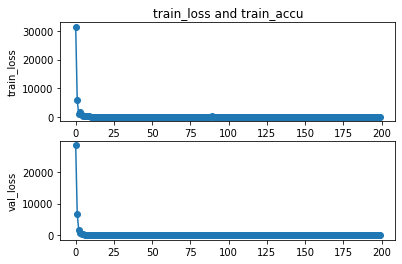

In [18]:
import matplotlib.pyplot as plt

x = range(0, N)
y1 = train_loss
#y2 = train_accu
y3 = val_loss
#y4 = val_accu
plt.subplot(2, 1, 1)
plt.plot(x, y1, 'o-')
plt.title('train_loss and train_accu')
plt.ylabel('train_loss')
#plt.subplot(2, 1, 2)
#plt.plot(x, y2, '.-')
#plt.xlabel('epoches')
#plt.ylabel('train_accu')
plt.subplot(2, 1, 2)
plt.plot(x, y3, 'o-')
plt.ylabel('val_loss')
#plt.subplot(2, 2, 2)
#plt.plot(x, y4, '.-')
#plt.title('val_loss and val_accu')
#lt.ylabel('val_accu')
plt.show()
#plt.savefig("accuracy_loss.jpg")


In [22]:
model.eval()

BaselineModel(
  (fc1): Linear(in_features=1000, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=1, bias=True)
)

In [20]:
model.eval()
test_loss = list()
for data in testloader:
    losses, nums = zip(
                *[loss_batch(model, loss_function, xb, yb) for xb, yb in testloader])
    test_loss1 = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    test_loss.append(test_loss1)

Text(0, 0.5, 'test_loss')

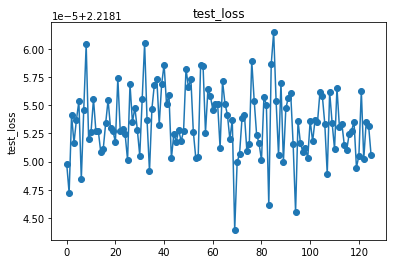

In [21]:
x = range(0, 126)
y3 = test_loss
plt.plot(x, y3, 'o-')
plt.title('test_loss')
plt.ylabel('test_loss')

In [156]:
for data in testloader:
    inputs, lablels = data
    predictions = model(inputs.float())
    loss = loss_function(predictions,labels)
    loss = loss/128
    print("loss",loss)
    print("predicted parameter:", predictions)
    print("setting parameter:", labels)

loss tensor(14811.8191, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2627.5593],
        [ 556.5002],
        [3223.1331],
        [1848.8593],
        [3939.7312],
        [2771.2019],
        [3142.8552],
        [2029.1793],
        [ 585.8016],
        [2398.2712],
        [3622.5781],
        [3633.1833],
        [2604.1226],
        [3403.3857],
        [ 179.4788],
        [3252.0999],
        [1795.3384],
        [ 915.1786],
        [1107.2458],
        [1148.8533],
        [1664.1786],
        [3442.8865],
        [2348.3723],
        [3230.1985],
        [3022.7644],
        [1126.1263],
        [ 668.7675],
        [3172.4270],
        [3459.9617],
        [2813.9592],
        [ 799.7416],
        [2228.1675],
        [1745.2810],
        [3726.9807],
        [ 480.1683],
        [1439.0403],
        [1974.0565],
        [2298.7278],
        [2703.8435],
        [1665.4919],
        [3512.9116],
        [3827.4285],
        [2718.2893],
       

        [1658.3073]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13114.0621, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[ 768.8901],
        [2264.5261],
        [3252.7673],
       

        [2693.9084]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13087.7771, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1438.7603],
        [2684.0137],
        [ 547.0867],
       

        [1158.1729]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14076.6691, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[ 117.8305],
        [1684.0127],
        [2968.3660],
       

        [2793.1196]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14402.1596, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3982.4944],
        [2369.6506],
        [2663.8865],
       

        [3866.8538]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13878.4661, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2198.6726],
        [3317.9470],
        [3847.0637],
       

        [3669.8516]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14127.4748, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2573.7693],
        [1397.8601],
        [3607.9348],
       

        [2763.6223]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13666.8850, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2587.6838],
        [3646.9866],
        [2677.9897],
       

        [2553.9231]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13456.4038, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2423.8621],
        [3193.7202],
        [2794.5393],
       

        [2992.8616]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14045.5641, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3752.6382],
        [2737.5457],
        [3697.7244],
       

        [3697.4917]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13718.8404, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3123.8650],
        [2615.1055],
        [2583.7651],
       

        [3613.0039]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(15071.6069, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2098.3499],
        [3313.1592],
        [2008.5950],
       

        [2574.3796]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12759.5976, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1740.1294],
        [2174.4358],
        [2997.8357],
       

        [2198.3850]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14132.8640, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[ 895.5540],
        [2404.3215],
        [3247.5886],
       

        [ 675.4980]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14232.2546, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1855.3379],
        [3118.2942],
        [3589.4062],
       

        [ 878.7654]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13009.3562, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3828.3767],
        [1769.4924],
        [3483.2180],
       

        [2318.3516]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13679.9571, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3062.5354],
        [2368.7083],
        [3302.2034],
       

        [3002.9739]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13097.6525, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1595.2850],
        [2818.8794],
        [ 944.4561],
       

        [1764.7146]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12362.6719, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3553.8625],
        [1778.3777],
        [3123.8435],
       

        [3866.5725]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12460.7952, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2434.1521],
        [2982.7117],
        [3533.0461],
       

        [3864.3679]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12651.3282, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3632.8999],
        [1396.2625],
        [1158.1843],
       

        [2264.3889]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13521.7534, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2454.2061],
        [3996.6763],
        [3143.2810],
       

        [2807.6948]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14157.0851, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3507.0945],
        [ 645.4312],
        [3323.2322],
       

        [ 574.1573]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(15771.3210, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[ 835.6504],
        [2428.3979],
        [2734.4578],
       

        [1979.4421]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14336.0684, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1723.2620],
        [2647.8308],
        [2474.5081],
       

        [1285.8060]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12476.8964, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2219.2778],
        [2364.4031],
        [1969.8628],
       

        [1528.2423]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12808.2925, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2584.2397],
        [1739.0483],
        [2928.3875],
       

        [ 877.6422]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12940.9918, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2644.8740],
        [1704.6465],
        [3553.4507],
       

        [3184.0510]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(11756.4618, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3936.0281],
        [3814.0432],
        [3702.6504],
       

        [2973.2080]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13575.2794, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3807.3892],
        [1288.0449],
        [1688.9109],
       

        [1367.9346]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13454.9895, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3107.9666],
        [3442.9897],
        [2574.0061],
       

        [2819.6738]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12747.7002, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1075.9148],
        [2378.5325],
        [3193.5461],
       

        [ 806.8636]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14316.3118, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1868.5468],
        [2174.6653],
        [3917.4502],
       

        [3499.7832]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12543.7193, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2653.8550],
        [3308.1555],
        [3280.1577],
       

        [3523.3074]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13323.4149, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2543.8103],
        [3756.6411],
        [1715.5378],
       

        [2120.6187]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12831.0103, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2484.4680],
        [1945.4709],
        [3670.8105],
       

        [1734.7083]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14587.0650, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[3113.4707],
        [2923.0305],
        [2454.0408],
       

        [2577.2976]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(13824.9006, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2643.7729],
        [ 266.1818],
        [ 583.1893],
       

        [3860.6638]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(11968.5061, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1705.3835],
        [1618.9890],
        [3762.3567],
       

        [3043.7371]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14440.1537, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1225.4973],
        [2863.0266],
        [3480.7061],
       

        [2004.3777]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(12775.1857, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[1831.8960],
        [1505.8140],
        [1498.3711],
       

        [1168.3367]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)
loss tensor(14273.2971, dtype=torch.float64, grad_fn=<DivBackward0>)
predicted parameter: tensor([[2818.9380],
        [1229.3589],
        [3592.6941],
       

        [3489.5579]], grad_fn=<AddmmBackward>)
setting parameter: tensor([3280., 2290., 2480., 3870., 3630., 3530., 3570., 2700., 2770., 2920.,
        2550., 3350., 1880., 3830., 3380., 1990., 2740., 3250., 3580., 1800.,
        1270.,  480., 3930., 4000., 1780., 1840., 3550., 2620.,  950., 3400.,
        1470., 1950., 3780., 3250., 3410., 2960., 3310., 2060., 1670., 3170.,
        2780., 3810.,  670., 1620., 2020., 3050., 2460., 2220., 1000., 1710.,
        2820.,  890., 3810., 2960., 2240., 3700., 1160., 2970., 3510., 1670.,
        1080., 2790., 2730., 3250., 2730., 3350., 3770., 2280., 2920., 1730.,
        2470., 3340., 2130., 2390., 3410., 3270., 3930., 1910., 3510., 2170.,
        3040., 2580., 3140., 1660., 3640., 3920., 3620., 2190., 2930., 3730.,
        2710., 1740., 3840., 3090., 3300., 2030.], dtype=torch.float64)


In [90]:
testdataset = ra.read('atomsroa.ra')
testdata = torch.tensor(testdataset)
testdata = testdata.imag
label1 = ra.read('paramsroa.ra')
label1 = torch.tensor(label1)

In [91]:
for i in range(8056):
    inputs = testdata[:,i]
    lablels = label1[0,i]
    predictions = model(inputs.float())

    print("predicted parameter:", predictions)
    print("setting parameter:", lablels)

predicted parameter: tensor([106.8176], grad_fn=<AddBackward0>)
setting parameter: tensor(100., dtype=torch.float64)
predicted parameter: tensor([114.4125], grad_fn=<AddBackward0>)
setting parameter: tensor(110., dtype=torch.float64)
predicted parameter: tensor([122.5417], grad_fn=<AddBackward0>)
setting parameter: tensor(120., dtype=torch.float64)
predicted parameter: tensor([131.0926], grad_fn=<AddBackward0>)
setting parameter: tensor(130., dtype=torch.float64)
predicted parameter: tensor([139.9724], grad_fn=<AddBackward0>)
setting parameter: tensor(140., dtype=torch.float64)
predicted parameter: tensor([149.1050], grad_fn=<AddBackward0>)
setting parameter: tensor(150., dtype=torch.float64)
predicted parameter: tensor([158.4289], grad_fn=<AddBackward0>)
setting parameter: tensor(160., dtype=torch.float64)
predicted parameter: tensor([167.8920], grad_fn=<AddBackward0>)
setting parameter: tensor(170., dtype=torch.float64)
predicted parameter: tensor([177.4519], grad_fn=<AddBackward0>)


predicted parameter: tensor([1486.2850], grad_fn=<AddBackward0>)
setting parameter: tensor(1490., dtype=torch.float64)
predicted parameter: tensor([1496.3019], grad_fn=<AddBackward0>)
setting parameter: tensor(1500., dtype=torch.float64)
predicted parameter: tensor([1506.2592], grad_fn=<AddBackward0>)
setting parameter: tensor(1510., dtype=torch.float64)
predicted parameter: tensor([1516.1567], grad_fn=<AddBackward0>)
setting parameter: tensor(1520., dtype=torch.float64)
predicted parameter: tensor([1525.9950], grad_fn=<AddBackward0>)
setting parameter: tensor(1530., dtype=torch.float64)
predicted parameter: tensor([1535.7740], grad_fn=<AddBackward0>)
setting parameter: tensor(1540., dtype=torch.float64)
predicted parameter: tensor([1545.8217], grad_fn=<AddBackward0>)
setting parameter: tensor(1550., dtype=torch.float64)
predicted parameter: tensor([1556.2343], grad_fn=<AddBackward0>)
setting parameter: tensor(1560., dtype=torch.float64)
predicted parameter: tensor([1566.9335], grad_fn

predicted parameter: tensor([2861.0320], grad_fn=<AddBackward0>)
setting parameter: tensor(2860., dtype=torch.float64)
predicted parameter: tensor([2870.8333], grad_fn=<AddBackward0>)
setting parameter: tensor(2870., dtype=torch.float64)
predicted parameter: tensor([2880.6531], grad_fn=<AddBackward0>)
setting parameter: tensor(2880., dtype=torch.float64)
predicted parameter: tensor([2890.6033], grad_fn=<AddBackward0>)
setting parameter: tensor(2890., dtype=torch.float64)
predicted parameter: tensor([2900.5090], grad_fn=<AddBackward0>)
setting parameter: tensor(2900., dtype=torch.float64)
predicted parameter: tensor([2910.3606], grad_fn=<AddBackward0>)
setting parameter: tensor(2910., dtype=torch.float64)
predicted parameter: tensor([2920.1575], grad_fn=<AddBackward0>)
setting parameter: tensor(2920., dtype=torch.float64)
predicted parameter: tensor([2929.9683], grad_fn=<AddBackward0>)
setting parameter: tensor(2930., dtype=torch.float64)
predicted parameter: tensor([2940.0024], grad_fn

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



tensor(3550., dtype=torch.float64)
predicted parameter: tensor([3561.7527], grad_fn=<AddBackward0>)
setting parameter: tensor(3560., dtype=torch.float64)
predicted parameter: tensor([3571.7874], grad_fn=<AddBackward0>)
setting parameter: tensor(3570., dtype=torch.float64)
predicted parameter: tensor([3581.7712], grad_fn=<AddBackward0>)
setting parameter: tensor(3580., dtype=torch.float64)
predicted parameter: tensor([3591.7097], grad_fn=<AddBackward0>)
setting parameter: tensor(3590., dtype=torch.float64)
predicted parameter: tensor([3601.7654], grad_fn=<AddBackward0>)
setting parameter: tensor(3600., dtype=torch.float64)
predicted parameter: tensor([3611.7710], grad_fn=<AddBackward0>)
setting parameter: tensor(3610., dtype=torch.float64)
predicted parameter: tensor([3621.7803], grad_fn=<AddBackward0>)
setting parameter: tensor(3620., dtype=torch.float64)
predicted parameter: tensor([3631.8838], grad_fn=<AddBackward0>)
setting parameter: tensor(3630., dtype=torch.float64)
predicted par

setting parameter: tensor(1450., dtype=torch.float64)
predicted parameter: tensor([1458.3082], grad_fn=<AddBackward0>)
setting parameter: tensor(1460., dtype=torch.float64)
predicted parameter: tensor([1468.2455], grad_fn=<AddBackward0>)
setting parameter: tensor(1470., dtype=torch.float64)
predicted parameter: tensor([1478.4780], grad_fn=<AddBackward0>)
setting parameter: tensor(1480., dtype=torch.float64)
predicted parameter: tensor([1488.6425], grad_fn=<AddBackward0>)
setting parameter: tensor(1490., dtype=torch.float64)
predicted parameter: tensor([1498.7393], grad_fn=<AddBackward0>)
setting parameter: tensor(1500., dtype=torch.float64)
predicted parameter: tensor([1508.7689], grad_fn=<AddBackward0>)
setting parameter: tensor(1510., dtype=torch.float64)
predicted parameter: tensor([1518.7312], grad_fn=<AddBackward0>)
setting parameter: tensor(1520., dtype=torch.float64)
predicted parameter: tensor([1528.6272], grad_fn=<AddBackward0>)
setting parameter: tensor(1530., dtype=torch.flo

setting parameter: tensor(3430., dtype=torch.float64)
predicted parameter: tensor([3441.0051], grad_fn=<AddBackward0>)
setting parameter: tensor(3440., dtype=torch.float64)
predicted parameter: tensor([3450.8276], grad_fn=<AddBackward0>)
setting parameter: tensor(3450., dtype=torch.float64)
predicted parameter: tensor([3460.5989], grad_fn=<AddBackward0>)
setting parameter: tensor(3460., dtype=torch.float64)
predicted parameter: tensor([3470.5952], grad_fn=<AddBackward0>)
setting parameter: tensor(3470., dtype=torch.float64)
predicted parameter: tensor([3480.6372], grad_fn=<AddBackward0>)
setting parameter: tensor(3480., dtype=torch.float64)
predicted parameter: tensor([3490.6274], grad_fn=<AddBackward0>)
setting parameter: tensor(3490., dtype=torch.float64)
predicted parameter: tensor([3500.5657], grad_fn=<AddBackward0>)
setting parameter: tensor(3500., dtype=torch.float64)
predicted parameter: tensor([3510.4526], grad_fn=<AddBackward0>)
setting parameter: tensor(3510., dtype=torch.flo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




setting parameter: tensor(1960., dtype=torch.float64)
predicted parameter: tensor([1969.0785], grad_fn=<AddBackward0>)
setting parameter: tensor(1970., dtype=torch.float64)
predicted parameter: tensor([1979.0665], grad_fn=<AddBackward0>)
setting parameter: tensor(1980., dtype=torch.float64)
predicted parameter: tensor([1988.9851], grad_fn=<AddBackward0>)
setting parameter: tensor(1990., dtype=torch.float64)
predicted parameter: tensor([1998.8395], grad_fn=<AddBackward0>)
setting parameter: tensor(2000., dtype=torch.float64)
predicted parameter: tensor([2008.8284], grad_fn=<AddBackward0>)
setting parameter: tensor(2010., dtype=torch.float64)
predicted parameter: tensor([2018.8207], grad_fn=<AddBackward0>)
setting parameter: tensor(2020., dtype=torch.float64)
predicted parameter: tensor([2028.8997], grad_fn=<AddBackward0>)
setting parameter: tensor(2030., dtype=torch.float64)
predicted parameter: tensor([2038.9086], grad_fn=<AddBackward0>)
setting parameter: tensor(2040., dtype=torch.fl

setting parameter: tensor(3760., dtype=torch.float64)
predicted parameter: tensor([3770.2981], grad_fn=<AddBackward0>)
setting parameter: tensor(3770., dtype=torch.float64)
predicted parameter: tensor([3780.4717], grad_fn=<AddBackward0>)
setting parameter: tensor(3780., dtype=torch.float64)
predicted parameter: tensor([3790.5950], grad_fn=<AddBackward0>)
setting parameter: tensor(3790., dtype=torch.float64)
predicted parameter: tensor([3800.6677], grad_fn=<AddBackward0>)
setting parameter: tensor(3800., dtype=torch.float64)
predicted parameter: tensor([3810.6914], grad_fn=<AddBackward0>)
setting parameter: tensor(3810., dtype=torch.float64)
predicted parameter: tensor([3820.6658], grad_fn=<AddBackward0>)
setting parameter: tensor(3820., dtype=torch.float64)
predicted parameter: tensor([3830.5911], grad_fn=<AddBackward0>)
setting parameter: tensor(3830., dtype=torch.float64)
predicted parameter: tensor([3840.4678], grad_fn=<AddBackward0>)
setting parameter: tensor(3840., dtype=torch.flo

setting parameter: tensor(1780., dtype=torch.float64)
predicted parameter: tensor([1789.0571], grad_fn=<AddBackward0>)
setting parameter: tensor(1790., dtype=torch.float64)
predicted parameter: tensor([1798.4193], grad_fn=<AddBackward0>)
setting parameter: tensor(1800., dtype=torch.float64)
predicted parameter: tensor([1808.5370], grad_fn=<AddBackward0>)
setting parameter: tensor(1810., dtype=torch.float64)
predicted parameter: tensor([1818.7192], grad_fn=<AddBackward0>)
setting parameter: tensor(1820., dtype=torch.float64)
predicted parameter: tensor([1828.8817], grad_fn=<AddBackward0>)
setting parameter: tensor(1830., dtype=torch.float64)
predicted parameter: tensor([1839.4170], grad_fn=<AddBackward0>)
setting parameter: tensor(1840., dtype=torch.float64)
predicted parameter: tensor([1849.4274], grad_fn=<AddBackward0>)
setting parameter: tensor(1850., dtype=torch.float64)
predicted parameter: tensor([1859.3729], grad_fn=<AddBackward0>)
setting parameter: tensor(1860., dtype=torch.flo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 tensor(300., dtype=torch.float64)
predicted parameter: tensor([308.5882], grad_fn=<AddBackward0>)
setting parameter: tensor(310., dtype=torch.float64)
predicted parameter: tensor([318.4767], grad_fn=<AddBackward0>)
setting parameter: tensor(320., dtype=torch.float64)
predicted parameter: tensor([328.2887], grad_fn=<AddBackward0>)
setting parameter: tensor(330., dtype=torch.float64)
predicted parameter: tensor([338.0242], grad_fn=<AddBackward0>)
setting parameter: tensor(340., dtype=torch.float64)
predicted parameter: tensor([347.6815], grad_fn=<AddBackward0>)
setting parameter: tensor(350., dtype=torch.float64)
predicted parameter: tensor([357.2625], grad_fn=<AddBackward0>)
setting parameter: tensor(360., dtype=torch.float64)
predicted parameter: tensor([366.7663], grad_fn=<AddBackward0>)
setting parameter: tensor(370., dtype=torch.float64)
predicted parameter: tensor([376.6424], grad_fn=<AddBackward0>)
setting parameter: tensor(380., dtype=torch.float64)
predicted parameter: tensor([

predicted parameter: tensor([2099.7932], grad_fn=<AddBackward0>)
setting parameter: tensor(2100., dtype=torch.float64)
predicted parameter: tensor([2109.7412], grad_fn=<AddBackward0>)
setting parameter: tensor(2110., dtype=torch.float64)
predicted parameter: tensor([2119.6172], grad_fn=<AddBackward0>)
setting parameter: tensor(2120., dtype=torch.float64)
predicted parameter: tensor([2129.5322], grad_fn=<AddBackward0>)
setting parameter: tensor(2130., dtype=torch.float64)
predicted parameter: tensor([2139.5156], grad_fn=<AddBackward0>)
setting parameter: tensor(2140., dtype=torch.float64)
predicted parameter: tensor([2149.4275], grad_fn=<AddBackward0>)
setting parameter: tensor(2150., dtype=torch.float64)
predicted parameter: tensor([2159.2683], grad_fn=<AddBackward0>)
setting parameter: tensor(2160., dtype=torch.float64)
predicted parameter: tensor([2169.2969], grad_fn=<AddBackward0>)
setting parameter: tensor(2170., dtype=torch.float64)
predicted parameter: tensor([2179.2932], grad_fn

setting parameter: tensor(3980., dtype=torch.float64)
predicted parameter: tensor([3985.1548], grad_fn=<AddBackward0>)
setting parameter: tensor(3990., dtype=torch.float64)
predicted parameter: tensor([3994.3672], grad_fn=<AddBackward0>)
setting parameter: tensor(4000., dtype=torch.float64)
predicted parameter: tensor([95.6795], grad_fn=<AddBackward0>)
setting parameter: tensor(100., dtype=torch.float64)
predicted parameter: tensor([104.4772], grad_fn=<AddBackward0>)
setting parameter: tensor(110., dtype=torch.float64)
predicted parameter: tensor([113.7221], grad_fn=<AddBackward0>)
setting parameter: tensor(120., dtype=torch.float64)
predicted parameter: tensor([123.3219], grad_fn=<AddBackward0>)
setting parameter: tensor(130., dtype=torch.float64)
predicted parameter: tensor([133.1989], grad_fn=<AddBackward0>)
setting parameter: tensor(140., dtype=torch.float64)
predicted parameter: tensor([143.2880], grad_fn=<AddBackward0>)
setting parameter: tensor(150., dtype=torch.float64)
predict

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



setting parameter: tensor(2290., dtype=torch.float64)
predicted parameter: tensor([2300.3308], grad_fn=<AddBackward0>)
setting parameter: tensor(2300., dtype=torch.float64)
predicted parameter: tensor([2310.4346], grad_fn=<AddBackward0>)
setting parameter: tensor(2310., dtype=torch.float64)
predicted parameter: tensor([2320.4670], grad_fn=<AddBackward0>)
setting parameter: tensor(2320., dtype=torch.float64)
predicted parameter: tensor([2330.4287], grad_fn=<AddBackward0>)
setting parameter: tensor(2330., dtype=torch.float64)
predicted parameter: tensor([2340.3198], grad_fn=<AddBackward0>)
setting parameter: tensor(2340., dtype=torch.float64)
predicted parameter: tensor([2350.1414], grad_fn=<AddBackward0>)
setting parameter: tensor(2350., dtype=torch.float64)
predicted parameter: tensor([2359.8936], grad_fn=<AddBackward0>)
setting parameter: tensor(2360., dtype=torch.float64)
predicted parameter: tensor([2369.5779], grad_fn=<AddBackward0>)
setting parameter: tensor(2370., dtype=torch.flo

setting parameter: tensor(180., dtype=torch.float64)
predicted parameter: tensor([184.8662], grad_fn=<AddBackward0>)
setting parameter: tensor(190., dtype=torch.float64)
predicted parameter: tensor([195.3304], grad_fn=<AddBackward0>)
setting parameter: tensor(200., dtype=torch.float64)
predicted parameter: tensor([205.8110], grad_fn=<AddBackward0>)
setting parameter: tensor(210., dtype=torch.float64)
predicted parameter: tensor([216.2924], grad_fn=<AddBackward0>)
setting parameter: tensor(220., dtype=torch.float64)
predicted parameter: tensor([226.7610], grad_fn=<AddBackward0>)
setting parameter: tensor(230., dtype=torch.float64)
predicted parameter: tensor([237.2056], grad_fn=<AddBackward0>)
setting parameter: tensor(240., dtype=torch.float64)
predicted parameter: tensor([247.6173], grad_fn=<AddBackward0>)
setting parameter: tensor(250., dtype=torch.float64)
predicted parameter: tensor([257.9890], grad_fn=<AddBackward0>)
setting parameter: tensor(260., dtype=torch.float64)
predicted p

predicted parameter: tensor([2140.0730], grad_fn=<AddBackward0>)
setting parameter: tensor(2140., dtype=torch.float64)
predicted parameter: tensor([2150.0442], grad_fn=<AddBackward0>)
setting parameter: tensor(2150., dtype=torch.float64)
predicted parameter: tensor([2160.0251], grad_fn=<AddBackward0>)
setting parameter: tensor(2160., dtype=torch.float64)
predicted parameter: tensor([2169.9324], grad_fn=<AddBackward0>)
setting parameter: tensor(2170., dtype=torch.float64)
predicted parameter: tensor([2179.7664], grad_fn=<AddBackward0>)
setting parameter: tensor(2180., dtype=torch.float64)
predicted parameter: tensor([2189.7979], grad_fn=<AddBackward0>)
setting parameter: tensor(2190., dtype=torch.float64)
predicted parameter: tensor([2199.7896], grad_fn=<AddBackward0>)
setting parameter: tensor(2200., dtype=torch.float64)
predicted parameter: tensor([2209.7080], grad_fn=<AddBackward0>)
setting parameter: tensor(2210., dtype=torch.float64)
predicted parameter: tensor([2219.8782], grad_fn

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 tensor([727.0542], grad_fn=<AddBackward0>)
setting parameter: tensor(730., dtype=torch.float64)
predicted parameter: tensor([737.3916], grad_fn=<AddBackward0>)
setting parameter: tensor(740., dtype=torch.float64)
predicted parameter: tensor([747.6514], grad_fn=<AddBackward0>)
setting parameter: tensor(750., dtype=torch.float64)
predicted parameter: tensor([757.8328], grad_fn=<AddBackward0>)
setting parameter: tensor(760., dtype=torch.float64)
predicted parameter: tensor([767.9362], grad_fn=<AddBackward0>)
setting parameter: tensor(770., dtype=torch.float64)
predicted parameter: tensor([777.9617], grad_fn=<AddBackward0>)
setting parameter: tensor(780., dtype=torch.float64)
predicted parameter: tensor([787.9086], grad_fn=<AddBackward0>)
setting parameter: tensor(790., dtype=torch.float64)
predicted parameter: tensor([797.7773], grad_fn=<AddBackward0>)
setting parameter: tensor(800., dtype=torch.float64)
predicted parameter: tensor([807.5677], grad_fn=<AddBackward0>)
setting parameter: t

predicted parameter: tensor([2589.6785], grad_fn=<AddBackward0>)
setting parameter: tensor(2590., dtype=torch.float64)
predicted parameter: tensor([2599.7891], grad_fn=<AddBackward0>)
setting parameter: tensor(2600., dtype=torch.float64)
predicted parameter: tensor([2609.8318], grad_fn=<AddBackward0>)
setting parameter: tensor(2610., dtype=torch.float64)
predicted parameter: tensor([2619.8069], grad_fn=<AddBackward0>)
setting parameter: tensor(2620., dtype=torch.float64)
predicted parameter: tensor([2629.7153], grad_fn=<AddBackward0>)
setting parameter: tensor(2630., dtype=torch.float64)
predicted parameter: tensor([2639.5574], grad_fn=<AddBackward0>)
setting parameter: tensor(2640., dtype=torch.float64)
predicted parameter: tensor([2649.5686], grad_fn=<AddBackward0>)
setting parameter: tensor(2650., dtype=torch.float64)
predicted parameter: tensor([2659.5598], grad_fn=<AddBackward0>)
setting parameter: tensor(2660., dtype=torch.float64)
predicted parameter: tensor([2669.4846], grad_fn

setting parameter: tensor(620., dtype=torch.float64)
predicted parameter: tensor([626.7753], grad_fn=<AddBackward0>)
setting parameter: tensor(630., dtype=torch.float64)
predicted parameter: tensor([636.2770], grad_fn=<AddBackward0>)
setting parameter: tensor(640., dtype=torch.float64)
predicted parameter: tensor([645.7078], grad_fn=<AddBackward0>)
setting parameter: tensor(650., dtype=torch.float64)
predicted parameter: tensor([655.0671], grad_fn=<AddBackward0>)
setting parameter: tensor(660., dtype=torch.float64)
predicted parameter: tensor([664.3548], grad_fn=<AddBackward0>)
setting parameter: tensor(670., dtype=torch.float64)
predicted parameter: tensor([673.5707], grad_fn=<AddBackward0>)
setting parameter: tensor(680., dtype=torch.float64)
predicted parameter: tensor([683.9859], grad_fn=<AddBackward0>)
setting parameter: tensor(690., dtype=torch.float64)
predicted parameter: tensor([694.7391], grad_fn=<AddBackward0>)
setting parameter: tensor(700., dtype=torch.float64)
predicted p

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




setting parameter: tensor(3080., dtype=torch.float64)
predicted parameter: tensor([3088.6638], grad_fn=<AddBackward0>)
setting parameter: tensor(3090., dtype=torch.float64)
predicted parameter: tensor([3098.7048], grad_fn=<AddBackward0>)
setting parameter: tensor(3100., dtype=torch.float64)
predicted parameter: tensor([3108.7446], grad_fn=<AddBackward0>)
setting parameter: tensor(3110., dtype=torch.float64)
predicted parameter: tensor([3118.7463], grad_fn=<AddBackward0>)
setting parameter: tensor(3120., dtype=torch.float64)
predicted parameter: tensor([3128.8184], grad_fn=<AddBackward0>)
setting parameter: tensor(3130., dtype=torch.float64)
predicted parameter: tensor([3138.8721], grad_fn=<AddBackward0>)
setting parameter: tensor(3140., dtype=torch.float64)
predicted parameter: tensor([3148.9639], grad_fn=<AddBackward0>)
setting parameter: tensor(3150., dtype=torch.float64)
predicted parameter: tensor([3158.9971], grad_fn=<AddBackward0>)
setting parameter: tensor(3160., dtype=torch.fl

setting parameter: tensor(1090., dtype=torch.float64)
predicted parameter: tensor([1098.6473], grad_fn=<AddBackward0>)
setting parameter: tensor(1100., dtype=torch.float64)
predicted parameter: tensor([1108.9452], grad_fn=<AddBackward0>)
setting parameter: tensor(1110., dtype=torch.float64)
predicted parameter: tensor([1119.1508], grad_fn=<AddBackward0>)
setting parameter: tensor(1120., dtype=torch.float64)
predicted parameter: tensor([1129.2646], grad_fn=<AddBackward0>)
setting parameter: tensor(1130., dtype=torch.float64)
predicted parameter: tensor([1139.2875], grad_fn=<AddBackward0>)
setting parameter: tensor(1140., dtype=torch.float64)
predicted parameter: tensor([1149.2198], grad_fn=<AddBackward0>)
setting parameter: tensor(1150., dtype=torch.float64)
predicted parameter: tensor([1159.0614], grad_fn=<AddBackward0>)
setting parameter: tensor(1160., dtype=torch.float64)
predicted parameter: tensor([1168.8137], grad_fn=<AddBackward0>)
setting parameter: tensor(1170., dtype=torch.flo

predicted parameter: tensor([3019.0146], grad_fn=<AddBackward0>)
setting parameter: tensor(3020., dtype=torch.float64)
predicted parameter: tensor([3028.9543], grad_fn=<AddBackward0>)
setting parameter: tensor(3030., dtype=torch.float64)
predicted parameter: tensor([3038.8987], grad_fn=<AddBackward0>)
setting parameter: tensor(3040., dtype=torch.float64)
predicted parameter: tensor([3048.8892], grad_fn=<AddBackward0>)
setting parameter: tensor(3050., dtype=torch.float64)
predicted parameter: tensor([3058.8193], grad_fn=<AddBackward0>)
setting parameter: tensor(3060., dtype=torch.float64)
predicted parameter: tensor([3068.7473], grad_fn=<AddBackward0>)
setting parameter: tensor(3070., dtype=torch.float64)
predicted parameter: tensor([3078.7031], grad_fn=<AddBackward0>)
setting parameter: tensor(3080., dtype=torch.float64)
predicted parameter: tensor([3088.6350], grad_fn=<AddBackward0>)
setting parameter: tensor(3090., dtype=torch.float64)
predicted parameter: tensor([3098.6331], grad_fn

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 tensor([1529.9220], grad_fn=<AddBackward0>)
setting parameter: tensor(1530., dtype=torch.float64)
predicted parameter: tensor([1539.7590], grad_fn=<AddBackward0>)
setting parameter: tensor(1540., dtype=torch.float64)
predicted parameter: tensor([1549.5077], grad_fn=<AddBackward0>)
setting parameter: tensor(1550., dtype=torch.float64)
predicted parameter: tensor([1559.4048], grad_fn=<AddBackward0>)
setting parameter: tensor(1560., dtype=torch.float64)
predicted parameter: tensor([1569.6060], grad_fn=<AddBackward0>)
setting parameter: tensor(1570., dtype=torch.float64)
predicted parameter: tensor([1579.7162], grad_fn=<AddBackward0>)
setting parameter: tensor(1580., dtype=torch.float64)
predicted parameter: tensor([1589.7362], grad_fn=<AddBackward0>)
setting parameter: tensor(1590., dtype=torch.float64)
predicted parameter: tensor([1599.6671], grad_fn=<AddBackward0>)
setting parameter: tensor(1600., dtype=torch.float64)
predicted parameter: tensor([1609.5096], grad_fn=<AddBackward0>)
set

setting parameter: tensor(3350., dtype=torch.float64)
predicted parameter: tensor([3359.0669], grad_fn=<AddBackward0>)
setting parameter: tensor(3360., dtype=torch.float64)
predicted parameter: tensor([3369.0872], grad_fn=<AddBackward0>)
setting parameter: tensor(3370., dtype=torch.float64)
predicted parameter: tensor([3379.0522], grad_fn=<AddBackward0>)
setting parameter: tensor(3380., dtype=torch.float64)
predicted parameter: tensor([3388.9995], grad_fn=<AddBackward0>)
setting parameter: tensor(3390., dtype=torch.float64)
predicted parameter: tensor([3399.1389], grad_fn=<AddBackward0>)
setting parameter: tensor(3400., dtype=torch.float64)
predicted parameter: tensor([3409.2698], grad_fn=<AddBackward0>)
setting parameter: tensor(3410., dtype=torch.float64)
predicted parameter: tensor([3419.3442], grad_fn=<AddBackward0>)
setting parameter: tensor(3420., dtype=torch.float64)
predicted parameter: tensor([3429.3630], grad_fn=<AddBackward0>)
setting parameter: tensor(3430., dtype=torch.flo

setting parameter: tensor(1450., dtype=torch.float64)
predicted parameter: tensor([1459.4088], grad_fn=<AddBackward0>)
setting parameter: tensor(1460., dtype=torch.float64)
predicted parameter: tensor([1469.3718], grad_fn=<AddBackward0>)
setting parameter: tensor(1470., dtype=torch.float64)
predicted parameter: tensor([1479.2433], grad_fn=<AddBackward0>)
setting parameter: tensor(1480., dtype=torch.float64)
predicted parameter: tensor([1489.4098], grad_fn=<AddBackward0>)
setting parameter: tensor(1490., dtype=torch.float64)
predicted parameter: tensor([1499.6595], grad_fn=<AddBackward0>)
setting parameter: tensor(1500., dtype=torch.float64)
predicted parameter: tensor([1509.8162], grad_fn=<AddBackward0>)
setting parameter: tensor(1510., dtype=torch.float64)
predicted parameter: tensor([1519.8805], grad_fn=<AddBackward0>)
setting parameter: tensor(1520., dtype=torch.float64)
predicted parameter: tensor([1529.8534], grad_fn=<AddBackward0>)
setting parameter: tensor(1530., dtype=torch.flo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 tensor(3940., dtype=torch.float64)
predicted parameter: tensor([3950.4045], grad_fn=<AddBackward0>)
setting parameter: tensor(3950., dtype=torch.float64)
predicted parameter: tensor([3960.0647], grad_fn=<AddBackward0>)
setting parameter: tensor(3960., dtype=torch.float64)
predicted parameter: tensor([3969.6775], grad_fn=<AddBackward0>)
setting parameter: tensor(3970., dtype=torch.float64)
predicted parameter: tensor([3979.2429], grad_fn=<AddBackward0>)
setting parameter: tensor(3980., dtype=torch.float64)
predicted parameter: tensor([3988.7627], grad_fn=<AddBackward0>)
setting parameter: tensor(3990., dtype=torch.float64)
predicted parameter: tensor([3998.2358], grad_fn=<AddBackward0>)
setting parameter: tensor(4000., dtype=torch.float64)
predicted parameter: tensor([140.8023], grad_fn=<AddBackward0>)
setting parameter: tensor(140., dtype=torch.float64)
predicted parameter: tensor([149.8315], grad_fn=<AddBackward0>)
setting parameter: tensor(150., dtype=torch.float64)
predicted parame

predicted parameter: tensor([1919.4636], grad_fn=<AddBackward0>)
setting parameter: tensor(1920., dtype=torch.float64)
predicted parameter: tensor([1929.7982], grad_fn=<AddBackward0>)
setting parameter: tensor(1930., dtype=torch.float64)
predicted parameter: tensor([1940.5253], grad_fn=<AddBackward0>)
setting parameter: tensor(1940., dtype=torch.float64)
predicted parameter: tensor([1950.5062], grad_fn=<AddBackward0>)
setting parameter: tensor(1950., dtype=torch.float64)
predicted parameter: tensor([1960.4054], grad_fn=<AddBackward0>)
setting parameter: tensor(1960., dtype=torch.float64)
predicted parameter: tensor([1970.2228], grad_fn=<AddBackward0>)
setting parameter: tensor(1970., dtype=torch.float64)
predicted parameter: tensor([1980.1277], grad_fn=<AddBackward0>)
setting parameter: tensor(1980., dtype=torch.float64)
predicted parameter: tensor([1990.0054], grad_fn=<AddBackward0>)
setting parameter: tensor(1990., dtype=torch.float64)
predicted parameter: tensor([1999.9779], grad_fn

## Saving models

Being able to train a model is fine, but in practice once we've trained the model we probably want to save the result so we can reuse it at a later time. PyTorch makes saving the model easy using the torch.save(state, filepath) function. This will save the weights of the model so they can be loaded into a new instance at a later point.

Run the following code to save the weights for use in the next part of the lab.

In [ ]:
#save the trained model weights
torch.save(model.state_dict(), "./BaselineModel.weights")

If you are running on Colab, run the following to download the weights to the local machine:

In [ ]:
from google.colab import files
files.download('BaselineModel.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)
model.load_state_dict(torch.load('BaselineModel.weights'))

<All keys matched successfully>